# Plots for validated Data 

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize
import pyslha
from collections import OrderedDict
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d,griddata
from scipy.interpolate import interp1d,LinearNDInterpolator,NearestNDInterpolator
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
#sns.set_context('paper', font_scale=1.8) "font.family": "sans-serif","font.sans-serif": ["Helvetica"],
sns.set(style="white", context="paper", font_scale=1.8, 
        rc={"text.usetex": True, 
            'font.family':'Times New Roman', 
            'font.serif':'Times New Roman', 
            "savefig.dpi": 300})
plt.rcParams['text.usetex'] = True

#sns.set_context('paper', font_scale=1.8) "font.family": "sans-serif","font.sans-serif": ["Helvetica"],
sns.set(style="white", context="paper", font_scale=1.8, 
        rc={"text.usetex": True, 
            'font.family':'Times New Roman', 
            'font.serif':'Times New Roman', 
            "savefig.dpi": 300})
plt.rcParams['text.usetex'] = True
def configure_axes(ax, info=None):   
    if info is not None:
        multiline_info = "\n".join(info)
        ax.text(0.2, 0.5, multiline_info, transform=ax.transAxes, fontsize=16,
                color='black', bbox=dict(facecolor='silver', alpha=0.5,
                                         edgecolor='silver', boxstyle='round,pad=0.8',
                                         linewidth=0.2))
    def set_x_label(label, size=18, labelpad=5):
        ax.set_xlabel(label, size=size, labelpad=labelpad, loc="right", fontname='serif')
    def set_y_label(label, size=18, labelpad=5):
        ax.set_ylabel(label, size=size, labelpad=labelpad, loc="top", fontname='serif')
    def set_legend(framealpha=0.5, fontsize='16'):
        ax.legend(framealpha=framealpha, loc='best', fontsize=fontsize)
    ax.set_x_label = set_x_label
    ax.set_y_label = set_y_label
    ax.minorticks_on() 
    ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
    ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_linewidth(1.2)
    sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
    ax.tick_params(axis='x', labelcolor='black', labelsize=16)
    ax.tick_params(axis='y', labelcolor='black', labelsize=16)

cm = plt.colormaps['RdYlBu']


/tmp/ipykernel_107295/2149704662.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import glob,imp,os,shutil


In [2]:
#Merge with SModelS DataFrame
dataDF = pd.read_csv('TRV1bb_data.csv')
#dataDF = pd.read_csv('TRV1bb_data.csv')
#print(dataDF.columns.values.tolist()) #Print all columns names#
dataDF

,Unnamed: 0,filename,mass.5000001,mass.5000521,width.5000001,width.5000521,extpar.1,extpar.2,extpar.3,extpar.4,...,ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,0,run_1419_MZp_6700_gAq_1.441080E-01.slha,6700.0,10000.0,0.000664,0.0,0.0,1.5,0.144108,0.0,...,['TRV1bb'],"[('y1', 6700.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,1392.754000,1320.143000,"[('y1', 0.0006639051)]"
1,1,run_510_MZp_3300_gAq_2.500000E+00.slha,3300.0,10000.0,0.098210,0.0,0.0,1.5,2.500000,0.0,...,['TRV1bb'],"[('y1', 3300.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,38.927270,43.658940,"[('y1', 0.09821011)]"
2,2,run_152_MZp_6500_gAq_6.000000E+00.slha,6500.0,10000.0,1.116485,0.0,0.0,1.5,6.000000,0.0,...,['TRV1bb'],"[('y1', 6500.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,2.926091,3.037007,"[('y1', 1.116485)]"
3,3,run_161_MZp_2000_gAq_3.500000E+00.slha,2000.0,10000.0,0.116119,0.0,0.0,1.5,3.500000,0.0,...,['TRV1bb'],"[('y1', 2000.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,852.317800,614.704900,"[('y1', 0.1161194)]"
4,4,run_692_MZp_4000_gAq_2.000000E-01.slha,4000.0,10000.0,0.000763,0.0,0.0,1.5,0.200000,0.0,...,['TRV1bb'],"[('y1', 4000.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,0.112118,0.094363,"[('y1', 0.0007625327)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1359,run_1538_MZp_7100_gAq_3.500000E+00.slha,7100.0,10000.0,0.415031,0.0,0.0,1.5,3.500000,0.0,...,['TRV1bb'],"[('y1', 7100.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,0.624538,0.437653,"[('y1', 0.4150313)]"
1360,1360,run_1278_MZp_6200_gAq_7.289680E-02.slha,6200.0,10000.0,0.000157,0.0,0.0,1.5,0.072897,0.0,...,['TRV1bb'],"[('y1', 6200.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,656.949300,681.539300,"[('y1', 0.0001571866)]"
1361,1361,run_1656_MZp_7600_gAq_7.289680E-02.slha,7600.0,10000.0,0.000193,0.0,0.0,1.5,0.072897,0.0,...,['TRV1bb'],"[('y1', 7600.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,1536.072000,906.872200,"[('y1', 0.00019273)]"
1362,1362,run_834_MZp_4500_gAq_2.500000E+00.slha,4500.0,10000.0,0.134091,0.0,0.0,1.5,2.500000,0.0,...,['TRV1bb'],"[('y1', 4500.0)]",CMS-EXO-20-008,NaN,13.0,138.0,upperLimit,9.481941,7.476595,"[('y1', 0.1340909)]"


In [3]:
dataDF = dataDF[~((dataDF['xsec13TeV(fb).5000001'] >= 9e+02) & 
                           (dataDF['xsec13TeV(fb).5000001'] <= 1e+04) & 
                           (dataDF['mass.5000001'] >= 4900) & 
                           (dataDF['mass.5000001'] <= 7900))].reset_index(drop=True)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
pd.set_option('display.float_format', '{:e}'.format)
#dataDF = dataDF[dataDF['extpar.3'] > 0.1].reset_index(drop=True)
dataDF

,Unnamed: 0,filename,mass.5000001,mass.5000521,width.5000001,width.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,1,run_510_MZp_3300_gAq_2.500000E+00.slha,3.300000e+03,1.000000e+04,9.821011e-02,0.000000e+00,0.000000e+00,1.500000e+00,2.500000e+00,0.000000e+00,3.077745e+03,1.671198e-01,1.671196e-01,1.671178e-01,1.644032e-01,3.077745e+03,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...",2.563399e+03,0.000000e+00,3.077745e+03,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1bb_slha/run_10_MZp_1800_gAq_5.000000E+00.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1bb_slha/run_510_MZp_3300_gAq_2.500000E+00....,3.0.0-beta,3.0.0-beta,0.000000e+00,5.143460e+02,1.321300e+01,1.178100e+01,['TRV1bb'],"[('y1', 3300.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,3.892727e+01,4.365894e+01,"[('y1', 0.09821011)]"
1,2,run_152_MZp_6500_gAq_6.000000E+00.slha,6.500000e+03,1.000000e+04,1.116485e+00,0.000000e+00,0.000000e+00,1.500000e+00,6.000000e+00,0.000000e+00,2.219355e+01,1.667835e-01,1.667834e-01,1.667829e-01,1.660832e-01,2.219355e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",1.849205e+01,0.000000e+00,2.219355e+01,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1bb_slha/run_10_MZp_1800_gAq_5.000000E+00.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1bb_slha/run_152_MZp_6500_gAq_6.000000E+00....,3.0.0-beta,3.0.0-beta,0.000000e+00,3.701505e+00,1.265000e+00,1.218800e+00,['TRV1bb'],"[('y1', 6500.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,2.926091e+00,3.037007e+00,"[('y1', 1.116485)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1362,run_834_MZp_4500_gAq_2.500000E+00.slha,4.500000e+03,1.000000e+04,1.340909e-01,0.000000e+00,0.000000e+00,1.500000e+00,2.500000e+00,0.000000e+00,2.470678e+02,1.669104e-01,1.669103e-01,1.669093e-01,1.654494e-01,2.470678e+02,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...",2.058299e+02,0.000000e+00,2.470678e+02,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1bb_slha/run_10_MZp_1800_gAq_5.000000E+00.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1bb_slha/run_834_MZp_4500_gAq_2.500000E+00....,3.0.0-beta,3.0.0-beta,0.000000e+00,4.123791e+01,4.349100e+00,5.515600e+00,['TRV1bb'],"[('y1', 4500.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,9.481941e+00,7.476595e+00,"[('y1', 

#### Set r = 0 for points with no results 

In [5]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)


#### Define exclusions

In [6]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [7]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))


Total number of points = 1082
Total excluded (LHC) = 544
Total allowed = 538



### Create analysis label for excluded points

In [8]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


/tmp/ipykernel_107295/3923628249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excluded['label'] = labels


In [9]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(544, 60)


In [10]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

CMS-EXO-20-008 (',',1,R,T,V,[,],b,b): 544


In [11]:
MY1 = [1.80E+03, 1.90E+03, 2.00E+03, 2.10E+03, 2.20E+03, 2.30E+03, 2.40E+03, 2.50E+03, 2.60E+03, 2.70E+03, 2.80E+03, 2.90E+03, 3.00E+03, 3.10E+03, 3.20E+03, 3.30E+03, 3.40E+03, 3.50E+03, 3.60E+03, 3.70E+03, 3.80E+03, 3.90E+03, 4.00E+03, 4.10E+03, 4.20E+03, 4.30E+03, 4.40E+03, 4.50E+03, 4.60E+03, 4.70E+03, 4.80E+03, 4.90E+03, 5.00E+03, 5.10E+03, 5.20E+03, 5.30E+03, 5.40E+03, 5.50E+03, 5.60E+03, 5.70E+03, 5.80E+03, 5.90E+03, 6.00E+03, 6.10E+03, 6.20E+03, 6.30E+03, 6.40E+03, 6.50E+03, 6.60E+03, 6.70E+03, 6.80E+03, 6.90E+03, 7.00E+03, 7.10E+03, 7.20E+03, 7.30E+03, 7.40E+03, 7.50E+03, 7.60E+03, 7.70E+03, 7.80E+03, 7.90E+03, 8.00E+03]
xsecObs_pb = [0.04067800000, 0.02229700000, 0.02551300000, 0.02227900000, 0.02119600000, 0.01975100000, 0.01921200000, 0.03255700000, 0.03853000000, 0.03760600000, 0.02766000000, 0.02358600000, 0.01769200000, 0.01376400000, 0.01657700000, 0.01321300000, 0.01103100000, 0.00820210000, 0.00810640000, 0.00937090000, 0.01066000000, 0.00922260000, 0.00665420000, 0.00546970000, 0.00451500000, 0.00418690000, 0.00457350000, 0.00434910000, 0.00424710000, 0.00371870000, 0.00486840000, 0.00467260000, 0.00436120000, 0.00382360000, 0.00311030000, 0.00266610000, 0.00241030000, 0.00211430000, 0.00192090000, 0.00191000000, 0.00189840000, 0.00182450000, 0.00183210000, 0.00169190000, 0.00155210000, 0.00149780000, 0.00141390000, 0.00126500000, 0.00113230000, 0.00101450000, 0.00090710000, 0.00077800000, 0.00066950000, 0.00058850000, 0.00051980000, 0.00046250000, 0.00042260000, 0.00039520000, 0.00037820000, 0.00036970000, 0.00037320000, 0.00039080000, 0.00040690000]
xsecObs_fb = [x * 1000 for x in xsecObs_pb]
xsecExp_pb = [0.05125000000, 0.04062500000, 0.03537500000, 0.03137500000, 0.02825000000, 0.02550000000, 0.02325000000, 0.02125000000, 0.01950000000, 0.01793800000, 0.01656200000, 0.01537500000, 0.01431200000, 0.01331200000, 0.01256200000, 0.01178100000, 0.01109400000, 0.01050000000, 0.00993750000, 0.00940620000, 0.00887500000, 0.00840620000, 0.00790620000, 0.00737500000, 0.00690620000, 0.00640620000, 0.00595310000, 0.00551560000, 0.00512500000, 0.00476560000, 0.00442190000, 0.00409380000, 0.00379690000, 0.00351560000, 0.00323440000, 0.00299220000, 0.00275000000, 0.00254690000, 0.00235160000, 0.00217190000, 0.00200000000, 0.00186720000, 0.00172660000, 0.00160940000, 0.00149610000, 0.00139450000, 0.00130470000, 0.00121880000, 0.00114060000, 0.00107030000, 0.00100390000, 0.00094140000, 0.00088670000, 0.00083980000, 0.00079300000, 0.00074800000, 0.00070900000, 0.00067380000, 0.00064060000, 0.00060940000, 0.00058200000, 0.00055660000, 0.00053320000]
xsecExp_fb = [x * 1000 for x in xsecExp_pb]


In [12]:
dataDF['extpar.1'].unique()

array([0.])

### Define colors and plotting order

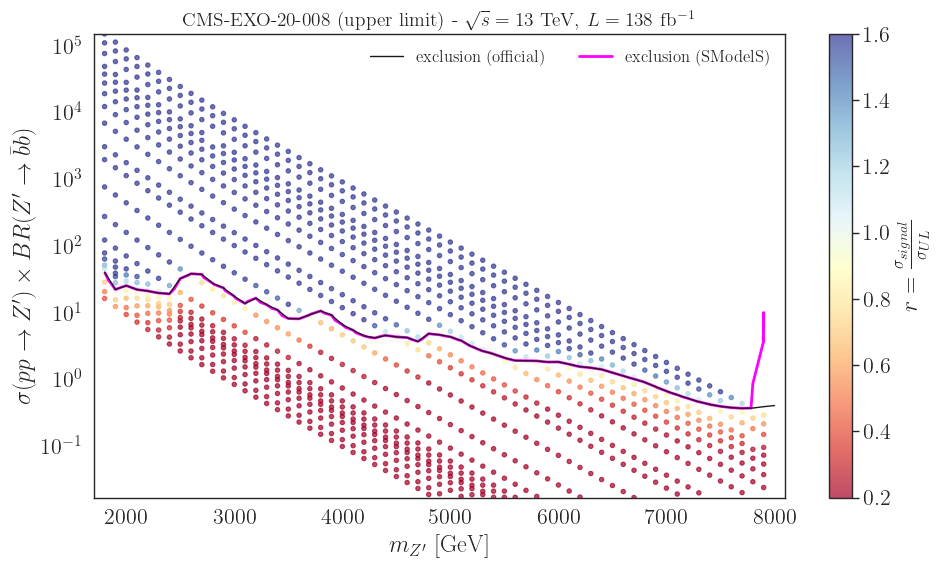

In [13]:
from scipy.interpolate import griddata, RectBivariateSpline

plt.figure(figsize=(10,6))
dataDF = dataDF.reset_index(drop=True)
x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']
order = c.argsort()
x, y, c = x.iloc[order], y.iloc[order], c.iloc[order]
sc = plt.scatter(x, y, c=c, s=10, cmap='RdYlBu', vmin=0.2, vmax=1.6, alpha=0.7)
levels = [1.0]  
cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)




smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
observed_line, = plt.plot(MY1, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')
plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$')
plt.xlim(1700, 8100)
#plt.ylim(1e-02, 1e04)
plt.yscale('log')
#plt.xscale('log')
plt.title('CMS-EXO-20-008 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 138$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
x_observed = np.array(MY1)
y_observed = np.array(xsecObs_fb)
x_cs = np.array(cs.allsegs[0][0][:, 0])  
y_cs = np.array(cs.allsegs[0][0][:, 1]) 
x_common = np.linspace(min(x_observed.min(), x_cs.min()), max(x_observed.max(), x_cs.max()), num=100)
interp_observed = interp1d(x_observed, y_observed, kind='linear', fill_value="extrapolate")
interp_cs = interp1d(x_cs, y_cs, kind='linear', fill_value="extrapolate")
y_observed_interp = interp_observed(x_common)
y_cs_interp = interp_cs(x_common)
rateobserved_cs = np.diff(y_observed_interp) / np.diff(x_common)
rateobserved_cs

array([-1.83810000e-01, -9.67253226e-02,  3.21600000e-02, -1.98561290e-02,
       -2.78298387e-02, -1.08300000e-02, -1.30487097e-02, -1.43038710e-02,
       -5.39000000e-03,  5.28332258e-02,  1.33450000e-01,  7.28093548e-02,
        4.41561290e-02, -9.24000000e-03, -6.59912903e-02, -9.75658065e-02,
       -4.07400000e-02, -4.86658065e-02, -5.89400000e-02, -4.24509677e-02,
       -2.29711290e-02,  2.81300000e-02, -1.17216129e-02, -3.30680645e-02,
       -2.18200000e-02, -2.47414839e-02, -2.82890000e-02, -4.92454839e-03,
        2.55319355e-03,  1.26450000e-02,  1.28076774e-02,  1.11319677e-02,
       -1.43740000e-02, -1.96641613e-02, -2.56840000e-02, -1.36306774e-02,
       -1.12149032e-02, -9.54700000e-03, -5.30229032e-03, -2.70462903e-03,
        3.86600000e-03,  9.09548387e-04, -2.24400000e-03, -1.15819355e-03,
       -2.25793548e-03, -5.28400000e-03,  6.35443548e-03,  1.01949032e-02,
       -1.95800000e-03, -2.53600000e-03, -3.11400000e-03, -5.15709677e-03,
       -5.91443548e-03, -

In [15]:
dataDF['ExptRes.result0.r_expected']

0      2.808923e+03
1      2.065726e+03
           ...     
1080   4.727622e-03
1081   4.266992e-03
Name: ExptRes.result0.r_expected, Length: 1082, dtype: float64

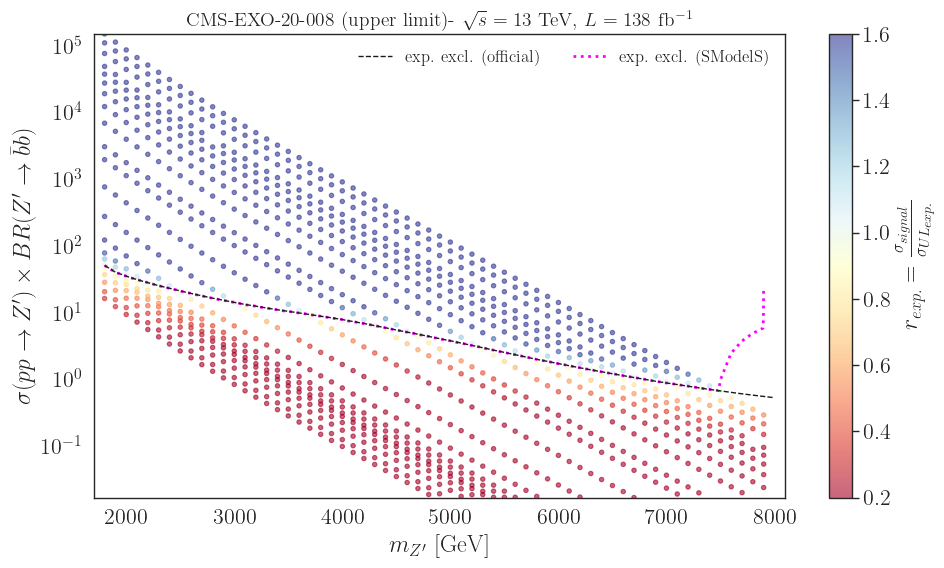

In [16]:
plt.figure(figsize=(10,6))
x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']
ce = dataDF['ExptRes.result0.r_expected']
order = c.argsort()
x, y, c, ce = x.iloc[order], y.iloc[order], c.iloc[order], ce.iloc[order]
sc = plt.scatter(x, y, c=ce, s=10, cmap='RdYlBu', vmin=0.2, vmax=1.6, alpha=0.6)
mask = np.isfinite(ce)
x, y, ce = x[mask], y[mask], ce[mask]
levels = [1.0]  
cs_exp = plt.tricontour(x, y, ce, levels=levels, colors='magenta', linestyles=':', linewidths=2.)
smodels_proxyE = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle=':', label='exp. excl. (SModelS)')
Expected_line, = plt.plot(MY1, xsecExp_fb, 'k--', linewidth=1, label='exp. excl. (official)')
plt.legend(handles=[Expected_line, smodels_proxyE], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r_{exp.} = \frac{\sigma_{signal}}{\sigma_{UL_{exp.}}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$')
plt.xlim(1700, 8100)
plt.yscale('log')
#plt.xscale('log')
plt.title('CMS-EXO-20-008 (upper limit)- $\sqrt{s} = 13$ TeV, $L = 138$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.show()

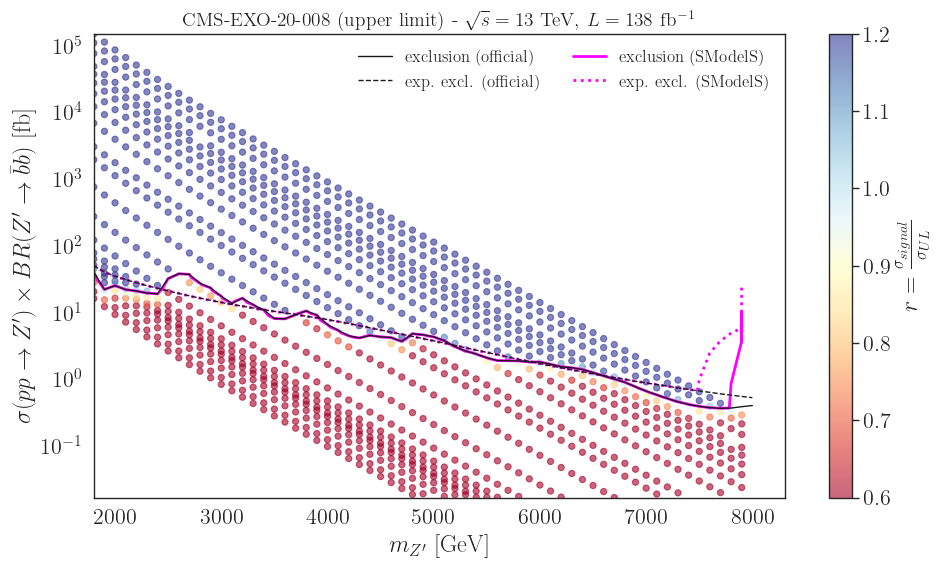

In [17]:
plt.figure(figsize=(10,6))
x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']
ce = dataDF['ExptRes.result0.r_expected']
order = c.argsort()
x, y, c, ce = x.iloc[order], y.iloc[order], c.iloc[order], ce.iloc[order]
sc = plt.scatter(x, y, c=c, s=20, cmap='RdYlBu', vmin=0.6, vmax=1.2, alpha=0.6)
mask = np.isfinite(ce) & np.isfinite(c)
x, y, c, ce = x[mask], y[mask], c[mask], ce[mask]
levels = [1.0]  
cs_exp = plt.tricontour(x, y, ce, levels=levels, colors='magenta', linestyles=':', linewidths=2)
cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2)
observed_line, = plt.plot(MY1, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')
Expected_line, = plt.plot(MY1, xsecExp_fb, 'k--', linewidth=1, label='exp. excl. (official)')
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2, linestyle='solid', label='exclusion (SModelS)')
smodels_proxyE = plt.Line2D([0], [0], color='magenta', linewidth=2, linestyle=':', label='exp. excl. (SModelS)')
plt.legend(handles=[observed_line, Expected_line, smodels_proxy, smodels_proxyE], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$ [fb]')
plt.yscale('log')
plt.title('CMS-EXO-20-008 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 138$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.savefig('CMS-EXO-20-008_xsec_UL.png')
plt.show()

In [18]:
points_outside_region = dataDF[dataDF['ExptRes.result0.r'] < 1.0]
print(points_outside_region[['mass.5000001', 'xsec13TeV(fb).5000001', 'ExptRes.result0.r']])


      mass.5000001  xsec13TeV(fb).5000001  ExptRes.result0.r
544   6.500000e+03           7.551844e+00       9.956667e-01
545   6.000000e+03           1.090056e+01       9.924387e-01
...            ...                    ...                ...
1080  4.900000e+03           1.159812e-01       4.142007e-03
1081  4.800000e+03           1.130646e-01       3.875650e-03

[538 rows x 3 columns]


In [19]:
blue_points = dataDF[dataDF['ExptRes.result0.r'] > 1]
mass_column = blue_points['mass.5000001']
xsec_column = blue_points['xsec13TeV(fb).5000001']
print(mass_column, xsec_column)


0     1.900000e+03
1     1.900000e+03
          ...     
542   2.200000e+03
543   2.100000e+03
Name: mass.5000001, Length: 544, dtype: float64 0     6.791306e+05
1     4.994433e+05
          ...     
542   1.304919e+02
543   1.367424e+02
Name: xsec13TeV(fb).5000001, Length: 544, dtype: float64


In [20]:
0.092 +0.005 

0.097

In [21]:
df = pd.read_csv('TRV1bb_data.csv')
df.to_csv('TRV1bb_data.csv', index=False)


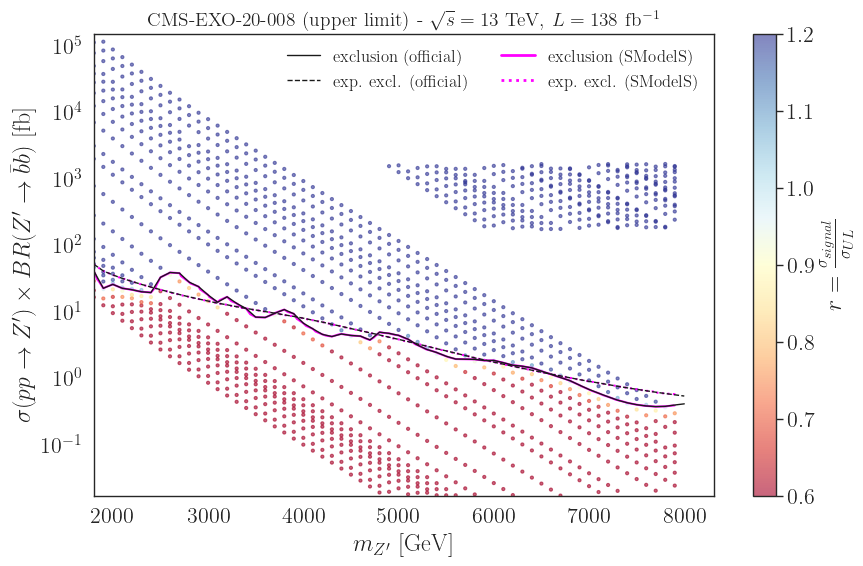

In [22]:
dataDF_csv = pd.read_csv('TRV1bb_data.csv')
x = dataDF_csv['mass.5000001']
y = dataDF_csv['xsec13TeV(fb).5000001'] * dataDF_csv['BRs.y1.b,b']
c = dataDF_csv['ExptRes.result0.r']
ce = dataDF_csv['ExptRes.result0.r_expected']
order = c.argsort()
x, y, c, ce = x.iloc[order], y.iloc[order], c.iloc[order], ce.iloc[order]

plt.figure(figsize=(10,6))
sc = plt.scatter(x, y, c=c, s=5, cmap='RdYlBu', vmin=0.6, vmax=1.2, alpha=0.6)
mask = np.isfinite(ce) & np.isfinite(c)
x_masked, y_masked, c_masked, ce_masked = x[mask], y[mask], c[mask], ce[mask]
levels = [1.0]
cs_exp = plt.tricontour(x_masked, y_masked, ce_masked, levels=levels, colors='magenta', linestyles=':', linewidths=1.5)
cs = plt.tricontour(x_masked, y_masked, c_masked, levels=levels, colors='magenta', linestyles='solid', linewidths=1.5)
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$ [fb]')
plt.yscale('log')
plt.title('CMS-EXO-20-008 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 138$ fb$^{-1}$', fontsize=14)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
observed_line, = plt.plot(MY1, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')
Expected_line, = plt.plot(MY1, xsecExp_fb, 'k--', linewidth=1, label='exp. excl. (official)')
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
smodels_proxyE = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle=':', label='exp. excl. (SModelS)')
plt.legend(handles=[observed_line, Expected_line, smodels_proxy, smodels_proxyE], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
plt.show()

In [23]:
numeric_columns = dataDF.select_dtypes(include=[np.number])
inf_in_columns = np.isinf(numeric_columns).any()
total_inf = np.isinf(numeric_columns).sum().sum()
print(inf_in_columns)
print(total_inf)


Unnamed: 0                    False
mass.5000001                  False
                              ...  
ExptRes.result0.r             False
ExptRes.result0.r_expected    False
Length: 37, dtype: bool
0
